In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def cluster(x1, x2, sigma, N=10):
    x1 = np.random.randn(N)*sigma + x1
    x2 = np.random.randn(N)*sigma + x2
    return np.vstack([x1, x2]).T


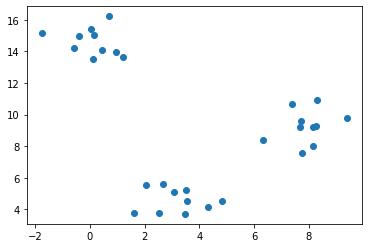

In [56]:
D = np.vstack([cluster(3, 5, 1), cluster(8,9,1), cluster(0,15,1)])
plt.scatter(D[:,0], D[:,1])

In [51]:
D.max(axis=0)

array([ 9.05630006, 20.62729836])

In [77]:
def kmeans_cluster(Data, N=2):
    for i in range(100):
        MU = random_centers(Data, N)
        Mask = split(Data, MU)
        MU = get_centers(Data, Mask, N)

    return Mask

In [31]:
def random_centers(Data, N):
    maxs = Data.max(axis=0)
    mins = Data.min(axis=0)

    MU = []
    for i in range(N):
        mu = []
        for min, max in zip(mins, maxs):
            x = min + np.random.rand()*(max-min)
            mu.append(x)
        mu = np.array(mu)
        MU.append(mu)

    return np.array(MU) 

In [21]:
MU = random_centers(D, 3)

In [19]:
def split(Data, MU):
    num_Data = Data.shape[0]
    num_MU = MU.shape[0]

    Dist = np.zeros([num_Data, num_MU])
    for i in range(num_Data):
        for j in range(num_MU):
            xi = Data[i]
            muj = MU[j]
            d = xi-muj
            d2 = (d**2).sum()
            Dist[i, j] = d2

    return Dist.argmin(axis=1)

In [22]:
Mask = split(D, MU)
Mask

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1])

In [76]:
def get_centers(Data, Mask, N):
    MU = []
    for n in range(N):
        mu = D[Mask==n].mean(axis=0)
        MU.append(mu)

    return np.array(MU)

In [30]:
get_centers(D, Mask, 3)

array([[3.43389663, 5.65147603],
       [8.9189593 , 8.929741  ],
       [7.02132426, 9.47191353]])

/tmp/ipykernel_12316/2454386518.py:4: RuntimeWarning: Mean of empty slice.
  mu = D[Mask==n].mean(axis=0)


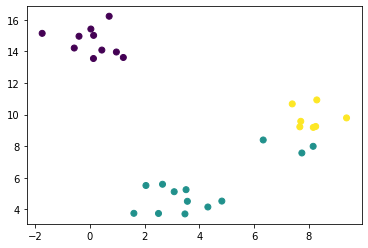

In [79]:
Mask = kmeans_cluster(D, 3)
plt.scatter(D[:,0], D[:,1], c=Mask)